In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 14,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})
plt.rcParams['xtick.labelsize']=12

In [3]:
map_key = "map_75"

In [4]:
df_tensor_jpeg_map = pd.read_csv("../measurements/tensor_jpeg/map.csv")
df_tensor_jpeg_time = pd.read_csv("../measurements/tensor_jpeg/time.csv")

df_frame_jpeg_map = pd.read_csv("../measurements/frame_jpeg/map.csv")
df_frame_jpeg_time = pd.read_csv("../measurements/frame_jpeg/time.csv")

df_tensor_ml_map = pd.read_csv("../measurements/tensor_ml/map.csv")
df_tensor_ml_time = pd.read_csv("../measurements/tensor_ml/time.csv")

df_frame_local_map = pd.read_csv("../measurements/frame_local/map.csv")
df_frame_local_time = pd.read_csv("../measurements/frame_local/time.csv")


## Map

In [5]:
tensor_jpeg_map_mean =[]
tensor_jpeg_map_std = []
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_map_mean.append(dfg[map_key].mean()*100)
    tensor_jpeg_map_std.append(dfg[map_key].std()*100)
tensor_jpeg_map_mean = np.array(tensor_jpeg_map_mean)
tensor_jpeg_map_std = np.array(tensor_jpeg_map_std)

In [6]:
frame_jpeg_map_mean =[]
frame_jpeg_map_std = []
jpeg_groups=df_frame_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_map_mean.append(dfg[map_key].mean()*100)
    frame_jpeg_map_std.append(dfg[map_key].std()*100)
frame_jpeg_map_mean = np.array(frame_jpeg_map_mean)
frame_jpeg_map_std = np.array(frame_jpeg_map_std)

In [7]:
tensor_ml_map_mean =[]
tensor_ml_map_std = []
jpeg_groups=df_tensor_ml_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_ml_map_mean.append(dfg[map_key].mean()*100)
    tensor_ml_map_std.append(dfg[map_key].std()*100)
tensor_ml_map_mean = np.array(tensor_ml_map_mean)
tensor_ml_map_std = np.array(tensor_ml_map_std)

## Data size

In [8]:
tensor_jpeg_datasize_mean =[]
tensor_jpeg_datasize_std = []
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_jpeg_datasize_mean =np.array(tensor_jpeg_datasize_mean)
tensor_jpeg_datasize_std = np.array(tensor_jpeg_datasize_std)

In [9]:
frame_jpeg_datasize_mean =[]
frame_jpeg_datasize_std = []
jpeg_groups=df_frame_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    frame_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
frame_jpeg_datasize_mean =np.array(frame_jpeg_datasize_mean)
frame_jpeg_datasize_std = np.array(frame_jpeg_datasize_std)

In [10]:
tensor_ml_datasize_mean =[]
tensor_ml_datasize_std = []
ml_groups=df_tensor_ml_map.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_ml_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_ml_datasize_mean =np.array(tensor_ml_datasize_mean)
tensor_ml_datasize_std = np.array(tensor_ml_datasize_std)

## Time

In [11]:
tensor_jpeg_elapsed_mean =[]
tensor_jpeg_network_mean = []
jpeg_groups=df_tensor_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
tensor_jpeg_elapsed_mean =np.array(tensor_jpeg_elapsed_mean)
tensor_jpeg_network_mean = np.array(tensor_jpeg_network_mean)

In [12]:
frame_jpeg_elapsed_mean =[]
frame_jpeg_network_mean = []
jpeg_groups=df_frame_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_elapsed_mean.append(dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    frame_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["model_time_mean"].mean())
frame_jpeg_elapsed_mean =np.array(frame_jpeg_elapsed_mean)
frame_jpeg_network_mean = np.array(frame_jpeg_network_mean)

In [13]:
tensor_ml_elapsed_mean =[]
tensor_ml_network_mean = []
ml_groups=df_tensor_ml_time.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_ml_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
tensor_ml_elapsed_mean =np.array(tensor_ml_elapsed_mean)
tensor_ml_network_mean = np.array(tensor_ml_network_mean)

## Plots

/tmp/ipykernel_87605/1757325510.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


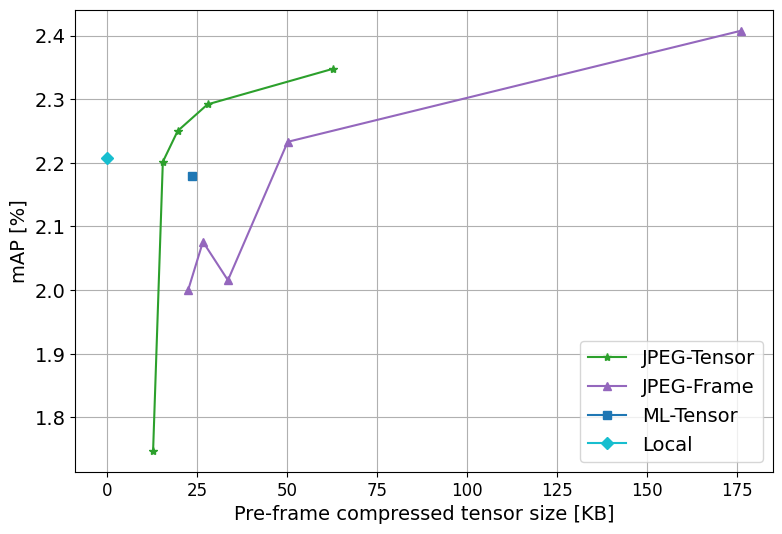

In [14]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_datasize_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
ax1.plot(frame_jpeg_datasize_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_datasize_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(0,df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame compressed tensor size [KB]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()

/tmp/ipykernel_87605/580035610.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


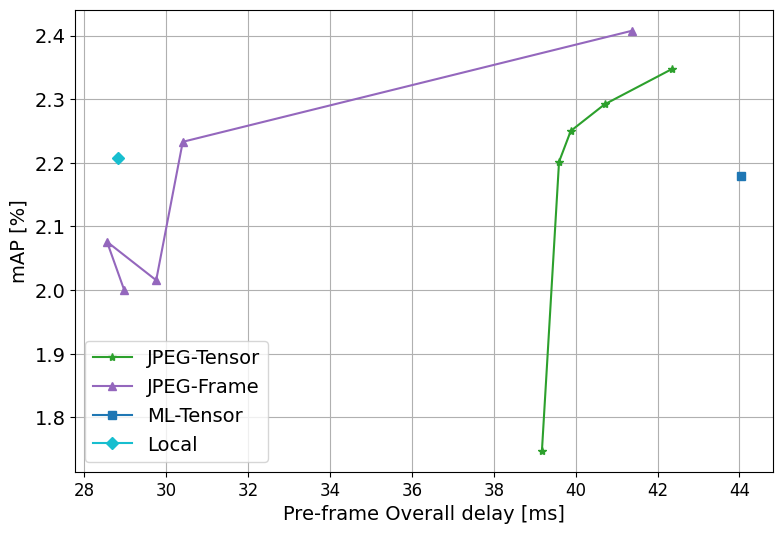

In [15]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_elapsed_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
ax1.plot(frame_jpeg_elapsed_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_elapsed_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(df_frame_local_time["model_time_mean"].mean(),df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame Overall delay [ms]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()